In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
import seaborn as sns
import yfinance as yf
from pathlib import Path
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
###Set Alpaca API key and secret
alpaca_api_key = os.getenv("api_key_id")
alpaca_secret_key = os.getenv("secret_api_key")
###Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
 # Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [71]:
###Format current date as ISO format
today = pd.Timestamp("2020-10-09", tz="America/New_York").isoformat()
###Set the tickers
tickers = ["AAPL", "GOOGL", "BRK.B", "JNJ"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
###Get current closing prices for SPY and AGG
stocks_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

###Preview DataFrame
stocks_portfolio

AAPL                                  BRK.B  \
                             open high     low   close    volume    open   
2020-10-09 00:00:00-04:00  115.28  117  114.92  116.98  86041259  215.88   

                                                                GOOGL  \
                               high     low   close   volume     open   
2020-10-09 00:00:00-04:00  216.2924  214.16  215.62  4903157  1492.86   

                                                               JNJ          \
                              high   low    close   volume    open    high   
2020-10-09 00:00:00-04:00  1511.85  1487  1510.45  1368884  149.67  151.48   

                                                     
                               low   close   volume  
2020-10-09 00:00:00-04:00  149.445  150.93  7666967

In [6]:
# Format start and end dates as ISO format for 5 year period
start = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-0-01", tz="America/New_York").isoformat()

In [7]:
# Get closing prices
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df
# Drop the time component of the date
df_portfolio_year.index = df_portfolio_year.index.date
# Display sample data
df_portfolio_year.head(5)

AAPL                                      BRK.B            \
              open    high      low   close    volume    open      high   
2015-01-02  111.39  111.44  107.350  109.30  47045497  151.50  151.6000   
2015-01-05  108.29  108.65  105.410  106.25  50146623  148.81  149.0000   
2015-01-06  106.56  107.43  104.630  106.23  59441540  147.64  148.5300   
2015-01-07  107.20  108.20  106.695  107.75  34452408  147.94  149.1399   
2015-01-08  109.23  112.15  108.700  111.87  50255019  150.60  151.3300   

                                         GOOGL                            \
                low   close     volume    open      high     low   close   
2015-01-02  148.500  149.13  2463511.0  532.60  535.8000  527.88  529.55   
2015-01-05  146.780  147.07  3261548.0  527.01  527.9899  517.75  519.24   
2015-01-06  146.111  146.70  3297957.0  520.50  521.2100  505.55  506.89   
2015-01-07  147.650  148.81  2696224.0  510.95  511.4900  503.65  505.15   
2015-01-08  150.510  151.25  3442794.0  501.51  507.5000  495.02  506.85   

                        JNJ                                    
             volume    open    high      low   close   volume  
2015-01-02   829538  105.05  105.55  104.130  104.49  4238082  
2015-01-05  1300076  104.48  104.73  103.682  103.85  6135505  
2015-01-06  1878228  104.34  104.99  102.940  103.25  6174712  
2015-01-07  1683477  103.91  105.83  103.810  105.56  6744677  
2015-01-08  2500177  106.06  106.49  105.750  106.38  7432752

In [8]:
# Create an empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["AAPL"] = df_portfolio_year["AAPL"]["close"]
df_closing_prices["GOOGL"] = df_portfolio_year["GOOGL"]["close"]
df_closing_prices["BRK.B"] = df_portfolio_year["BRK.B"]["close"]
df_closing_prices["JNJ"] = df_portfolio_year["JNJ"]["close"]

# Display sample data
df_closing_prices.head(10)

AAPL   GOOGL   BRK.B     JNJ
2015-01-02  109.30  529.55  149.13  104.49
2015-01-05  106.25  519.24  147.07  103.85
2015-01-06  106.23  506.89  146.70  103.25
2015-01-07  107.75  505.15  148.81  105.56
2015-01-08  111.87  506.85  151.25  106.38
2015-01-09  112.00  500.66  149.53  104.96
2015-01-12  109.24  497.07  148.33  104.60
2015-01-13  110.22  501.76  148.54  104.74
2015-01-14  109.79  505.80  147.77  103.98
2015-01-15  106.83  504.09  147.60  102.54

In [9]:
df_daily_return = df_closing_prices.pct_change()
df_daily_return = df_daily_return.dropna()
df_daily_return.head()

AAPL     GOOGL     BRK.B       JNJ
2015-01-05 -0.027905 -0.019469 -0.013813 -0.006125
2015-01-06 -0.000188 -0.023785 -0.002516 -0.005778
2015-01-07  0.014309 -0.003433  0.014383  0.022373
2015-01-08  0.038237  0.003365  0.016397  0.007768
2015-01-09  0.001162 -0.012213 -0.011372 -0.013348

In [10]:
df_daily_return.dtypes

AAPL     float64
GOOGL    float64
BRK.B    float64
JNJ      float64
dtype: object

In [11]:
portfolio_std = df_daily_return.std().sort_values()
portfolio_std

JNJ      0.012245
BRK.B    0.013185
GOOGL    0.016796
AAPL     0.018239
dtype: float64

In [12]:
###Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
#Set weights
##Calculate portfolio return
###Display sample data
weights = [0.25, 0.25, 0.25, 0.25]

portfolios_returns = df_daily_return.dot(weights)
portfolios_returns.head()

2015-01-05   -0.016828
2015-01-06   -0.008067
2015-01-07    0.011908
2015-01-08    0.016442
2015-01-09   -0.008943
dtype: float64

In [13]:
#ADD TESLA stock in the portfolio
# Get historical data of TESLA stock
tesla_portfolio_year = alpaca.get_barset(
    "TSLA",
    timeframe,
    start = start,
    end = end
).df
# Drop the time component of the date
tesla_portfolio_year.index = tesla_portfolio_year.index.date
# Create an empty DataFrame for closing prices
tesla_closing_prices = pd.DataFrame()
# Fetch the closing prices of FB and TWTR
tesla_closing_prices["TSLA"] = tesla_portfolio_year["TSLA"]["close"]
tesla_daily_return=tesla_closing_prices.pct_change().dropna()

In [14]:
#CONCAT TESLA STOCK WITH THE PORTFOLIO
wtesla_daily_return = pd.concat([df_daily_return, tesla_daily_return], axis="columns", join="inner")
wtesla_daily_return.head()

AAPL     GOOGL     BRK.B       JNJ      TSLA
2015-01-05 -0.027905 -0.019469 -0.013813 -0.006125 -0.041881
2015-01-06 -0.000188 -0.023785 -0.002516 -0.005778  0.005619
2015-01-07  0.014309 -0.003433  0.014383  0.022373 -0.001799
2015-01-08  0.038237  0.003365  0.016397  0.007768 -0.001233
2015-01-09  0.001162 -0.012213 -0.011372 -0.013348 -0.018760

In [15]:
###Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
#Set weights
##Calculate portfolio return
###Display sample data
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

wtesla_portfolios_returns = wtesla_daily_return.dot(weights)
wtesla_portfolios_returns.head()

2015-01-05   -0.021839
2015-01-06   -0.005330
2015-01-07    0.009167
2015-01-08    0.012907
2015-01-09   -0.010906
dtype: float64

In [16]:
# Open S&P 500 historical prices
file_path = Path("Resources\S&P500_5years.csv")
sp500 = pd.read_csv(file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp500.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2015-11-04  2110.600098  2114.590088  2096.979980  2102.310059  2102.310059   
2015-11-05  2101.679932  2108.780029  2090.409912  2099.929932  2099.929932   
2015-11-06  2098.600098  2101.909912  2083.739990  2099.199951  2099.199951   
2015-11-09  2096.560059  2096.560059  2068.239990  2078.580078  2078.580078   
2015-11-10  2077.189941  2083.669922  2069.909912  2081.719971  2081.719971   

                Volume  
Date                    
2015-11-04  4078870000  
2015-11-05  4051890000  
2015-11-06  4369020000  
2015-11-09  3882350000  
2015-11-10  3821440000

In [17]:
# Fetch the closing prices of S&P500
sp500_closing_prices = pd.DataFrame()
sp500_closing_prices["S&P500"] = sp500["Close"]
sp500_closing_prices_daily = sp500_closing_prices.pct_change().dropna().copy()

In [18]:
#Concatenate STOCKS & INDEX
all_portfolio = pd.concat([portfolios_returns, wtesla_portfolios_returns, sp500_closing_prices_daily], axis="columns", join="inner")
all_portfolio_concat = all_portfolio.rename(columns= {0 : "wo_Tesla", 1 : "w_Tesla"})
all_portfolio_concat.tail()

wo_Tesla   w_Tesla    S&P500
2020-07-27  0.004614  0.021260  0.007395
2020-07-28 -0.005934 -0.013132 -0.006473
2020-07-29  0.010235  0.011528  0.012428
2020-07-30  0.003377  0.001026 -0.003750
2020-07-31  0.018317  0.007201  0.007671

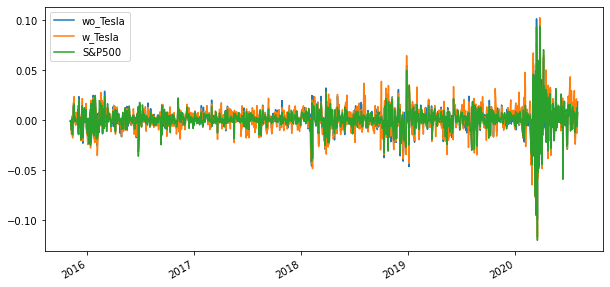

In [19]:
all_portfolio_concat.plot(figsize=(10,5))

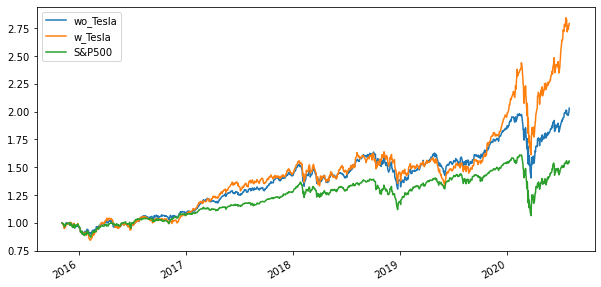

In [20]:
df_cumulative = (1 + all_portfolio_concat).cumprod()
df_cumulative.plot(figsize=(10, 5))

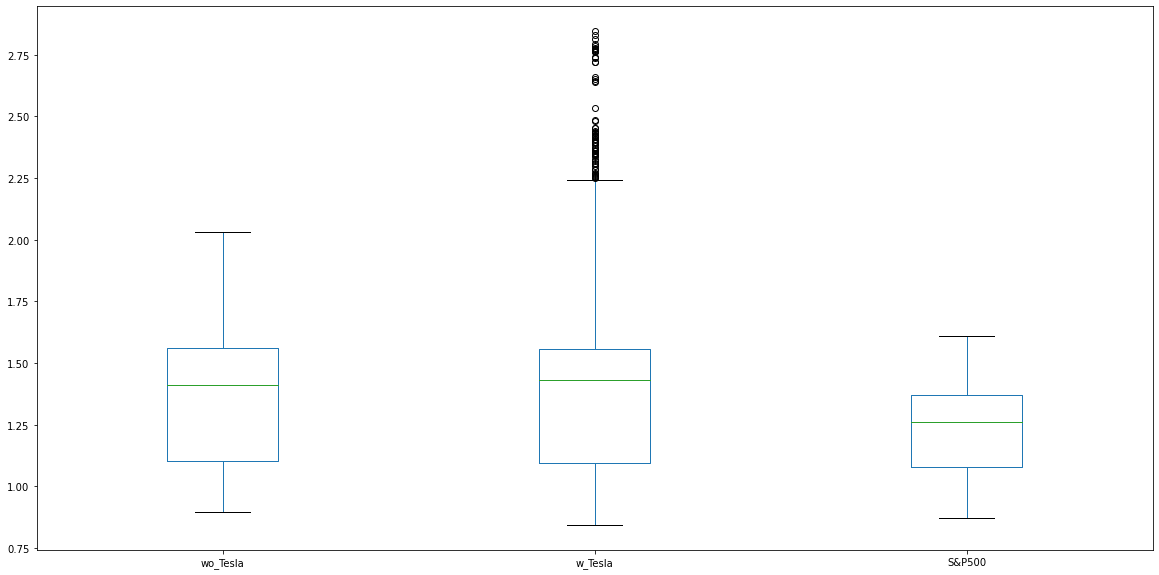

In [21]:
df_cumulative.plot.box(figsize=(20,10))

In [22]:
portfolio_std = all_portfolio_concat.std().sort_values()
portfolio_std

S&P500      0.012160
wo_Tesla    0.012480
w_Tesla     0.014174
dtype: float64

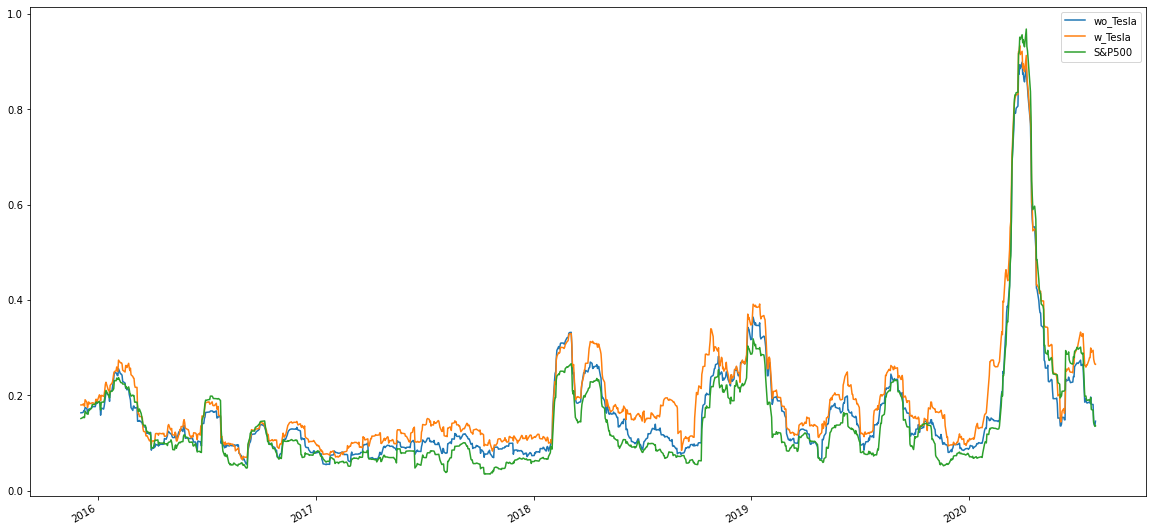

In [23]:
annualized_std = all_portfolio_concat * np.sqrt(252)
annualized_std.rolling(window=21).std().plot(figsize=(20,10))

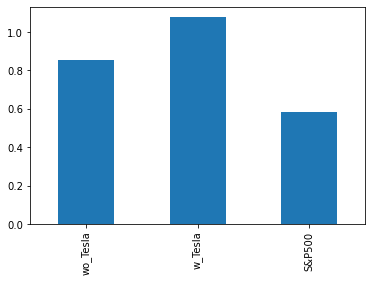

In [24]:
sharpe_ratios = (all_portfolio_concat.mean() * 252) / (all_portfolio_concat.std() * np.sqrt(252))
sharpe_ratios.plot(kind="bar")

In [25]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast 5 years daily returns
MC_wo_tesla_5y = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [0.25, 0.25, 0.25, 0.25],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
MC_wo_tesla_5y.portfolio_data.head()

AAPL                                                   BRK.B  \
              open    high      low   close    volume daily_return    open   
2015-01-02  111.39  111.44  107.350  109.30  47045497          NaN  151.50   
2015-01-05  108.29  108.65  105.410  106.25  50146623    -0.027905  148.81   
2015-01-06  106.56  107.43  104.630  106.23  59441540    -0.000188  147.64   
2015-01-07  107.20  108.20  106.695  107.75  34452408     0.014309  147.94   
2015-01-08  109.23  112.15  108.700  111.87  50255019     0.038237  150.60   

                                       ...   GOOGL                   \
                high      low   close  ...     low   close   volume   
2015-01-02  151.6000  148.500  149.13  ...  527.88  529.55   829538   
2015-01-05  149.0000  146.780  147.07  ...  517.75  519.24  1300076   
2015-01-06  148.5300  146.111  146.70  ...  505.55  506.89  1878228   
2015-01-07  149.1399  147.650  148.81  ...  503.65  505.15  1683477   
2015-01-08  151.3300  150.510  151.25  ...  495.02  506.85  2500177   

                            JNJ                                                 
           daily_return    open    high      low   close   volume daily_return  
2015-01-02          NaN  105.05  105.55  104.130  104.49  4238082          NaN  
2015-01-05    -0.019469  104.48  104.73  103.682  103.85  6135505    -0.006125  
2015-01-06    -0.023785  104.34  104.99  102.940  103.25  6174712    -0.005778  
2015-01-07    -0.003433  103.91  105.83  103.810  105.56  6744677     0.022373  
2015-01-08     0.003365  106.06  106.49  105.750  106.38  7432752     0.007768  

[5 rows x 24 columns]

In [26]:
MC_wo_tesla_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997243  0.994379  0.995171  1.000658  0.997225  1.004624  0.993798   
2     0.997181  0.984057  0.993995  1.010695  0.985783  1.005822  1.001361   
3     0.999479  0.981407  1.008231  1.008732  0.980082  1.000263  0.993238   
4     1.001340  0.978509  1.002799  1.008929  0.982725  0.993596  0.987994   
...        ...       ...       ...       ...       ...       ...       ...   
1256  3.172186  2.016743  1.944820  1.871013  1.459997  2.400127  2.969845   
1257  3.188442  2.011036  1.948976  1.862952  1.449896  2.398031  2.979050   
1258  3.213472  1.973766  1.947862  1.880813  1.451330  2.381460  2.986681   
1259  3.251550  1.974625  1.937536  1.859877  1.449111  2.352826  2.973062   
1260  3.282832  1.979346  1.950700  1.864227  1.451193  2.346779  2.973304   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000099  1.012718  0.989850  ...  1.003427  1.015207  1.006630   
2     1.001198  1.015743  0.993340  ...  0.989945  1.037857  1.002999   
3     0.998757  1.019958  0.990019  ...  0.990745  1.029196  0.999740   
4     0.998338  1.016592  0.990511  ...  1.000012  1.037232  1.005782   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.440734  2.039697  2.396523  ...  4.910499  2.794796  1.764120   
1257  2.435674  2.081569  2.424837  ...  4.873391  2.781500  1.750843   
1258  2.459127  2.081101  2.424191  ...  4.841940  2.813064  1.758460   
1259  2.461111  2.100341  2.445716  ...  4.819090  2.817884  1.764513   
1260  2.463658  2.116173  2.413093  ...  4.846205  2.823761  1.775047   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.990247  0.996296  1.001750  1.000751  0.998492  0.999999  0.995183  
2     0.995403  0.997086  0.997314  0.998711  0.994457  0.998917  0.998802  
3     0.989802  0.991830  1.012368  1.014496  1.001837  0.993340  1.003309  
4     0.998719  0.985445  1.005803  1.027667  0.993023  0.989727  0.991493  
...        ...       ...       ...       ...       ...       ...       ...  
1256  2.730540  2.004123  2.238797  3.681889  2.303697  2.225002  1.707899  
1257  2.733639  2.011915  2.234462  3.618928  2.289114  2.246531  1.713428  
1258  2.699085  2.016102  2.276640  3.661822  2.285933  2.282859  1.722007  
1259  2.712115  2.032354  2.286714  3.701079  2.279594  2.305772  1.730876  
1260  2.705607  2.039523  2.277725  3.671246  2.270937  2.266443  1.745352  

[1261 rows x 500 columns]

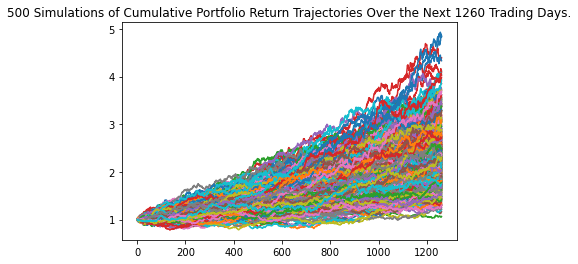

In [27]:
 # Plot simulation outcomes
line_plot_wo5y = MC_wo_tesla_5y.plot_simulation()

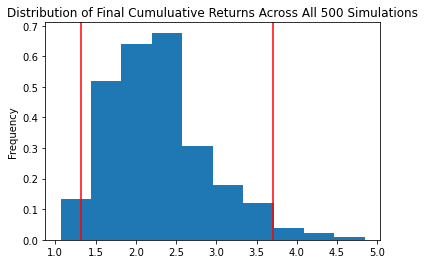

In [28]:
dist_plot_wo5y = MC_wo_tesla_5y.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_wo5y = MC_wo_tesla_5y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_wo5y)

count           500.000000
mean              2.292915
std               0.619058
min               1.065356
25%               1.828335
50%               2.226429
75%               2.583086
max               4.846205
95% CI Lower      1.321715
95% CI Upper      3.706404
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_wo5y = round(stocks_tbl_wo5y[8]*initial_investment,2)
ci_upper_wo5y = round(stocks_tbl_wo5y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_wo5y} and ${ci_upper_wo5y} over the next 5 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $13217.15 and $37064.04 over the next 5 years


In [31]:
# Configure a Monte Carlo simulation to forecast 10 years daily returns
MC_wo_tesla_10y = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [0.25, 0.25, 0.25, 0.25],
    num_simulation = num_sims,
    num_trading_days = 252*10
)
MC_wo_tesla_10y.portfolio_data.head()

AAPL                                                   BRK.B  \
              open    high      low   close    volume daily_return    open   
2015-01-02  111.39  111.44  107.350  109.30  47045497          NaN  151.50   
2015-01-05  108.29  108.65  105.410  106.25  50146623    -0.027905  148.81   
2015-01-06  106.56  107.43  104.630  106.23  59441540    -0.000188  147.64   
2015-01-07  107.20  108.20  106.695  107.75  34452408     0.014309  147.94   
2015-01-08  109.23  112.15  108.700  111.87  50255019     0.038237  150.60   

                                       ...   GOOGL                   \
                high      low   close  ...     low   close   volume   
2015-01-02  151.6000  148.500  149.13  ...  527.88  529.55   829538   
2015-01-05  149.0000  146.780  147.07  ...  517.75  519.24  1300076   
2015-01-06  148.5300  146.111  146.70  ...  505.55  506.89  1878228   
2015-01-07  149.1399  147.650  148.81  ...  503.65  505.15  1683477   
2015-01-08  151.3300  150.510  151.25  ...  495.02  506.85  2500177   

                            JNJ                                                 
           daily_return    open    high      low   close   volume daily_return  
2015-01-02          NaN  105.05  105.55  104.130  104.49  4238082          NaN  
2015-01-05    -0.019469  104.48  104.73  103.682  103.85  6135505    -0.006125  
2015-01-06    -0.023785  104.34  104.99  102.940  103.25  6174712    -0.005778  
2015-01-07    -0.003433  103.91  105.83  103.810  105.56  6744677     0.022373  
2015-01-08     0.003365  106.06  106.49  105.750  106.38  7432752     0.007768  

[5 rows x 24 columns]

In [32]:
MC_wo_tesla_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3          4         5         6    \
0     1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000   
1     0.999140  0.995285  1.004602  1.003218   1.001788  1.004813  1.006265   
2     1.014368  0.988932  1.003403  1.010505   1.016877  1.006897  0.996477   
3     1.005130  0.992166  0.999785  1.016478   1.005932  1.002137  1.006730   
4     1.004234  0.991927  0.989370  1.010234   1.014253  1.000624  1.005001   
...        ...       ...       ...       ...        ...       ...       ...   
2516  6.319444  3.246930  3.702557  4.177032  14.807878  2.937368  4.184138   
2517  6.345546  3.266560  3.709746  4.174064  14.847110  2.950327  4.130613   
2518  6.298801  3.303916  3.730077  4.152545  14.858649  2.918292  4.132185   
2519  6.317892  3.252700  3.680251  4.162389  14.930310  2.958446  4.097423   
2520  6.350429  3.266789  3.715732  4.194899  14.870477  2.956926  4.079353   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.997955  0.998990  0.999215  ...  1.003133  0.991310  1.002985   
2     0.992783  0.997019  1.002368  ...  0.999506  0.983630  1.001034   
3     0.989946  1.010116  0.995484  ...  1.013005  0.980782  0.998556   
4     0.985821  1.020714  0.990175  ...  1.021777  0.971654  0.998864   
...        ...       ...       ...  ...       ...       ...       ...   
2516  4.274098  5.483909  4.490544  ...  4.820857  8.447668  5.203333   
2517  4.291161  5.440255  4.437908  ...  4.855405  8.377762  5.212108   
2518  4.332821  5.377617  4.441692  ...  4.856593  8.360551  5.191876   
2519  4.321112  5.478480  4.486520  ...  4.822825  8.352876  5.195000   
2520  4.280596  5.462451  4.446588  ...  4.799019  8.332315  5.260981   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.009707  0.994154  1.004035  0.998154  0.998005  1.000352  1.003520  
2     1.014332  1.004848  0.999927  0.986585  0.999072  1.004340  1.001471  
3     1.023709  0.992981  0.993923  0.985669  1.006836  1.013811  0.992024  
4     1.022443  0.993233  1.013308  0.993912  1.002321  1.008718  0.991966  
...        ...       ...       ...       ...       ...       ...       ...  
2516  4.398731  4.215150  6.318140  4.111358  5.854070  4.491408  3.786364  
2517  4.372098  4.272030  6.315755  4.094465  5.902285  4.480544  3.814548  
2518  4.372379  4.273097  6.347868  4.071077  5.914893  4.461590  3.760326  
2519  4.349145  4.277229  6.318376  4.073148  5.931592  4.461642  3.758766  
2520  4.379827  4.236193  6.264303  4.046294  5.990621  4.482447  3.803057  

[2521 rows x 500 columns]

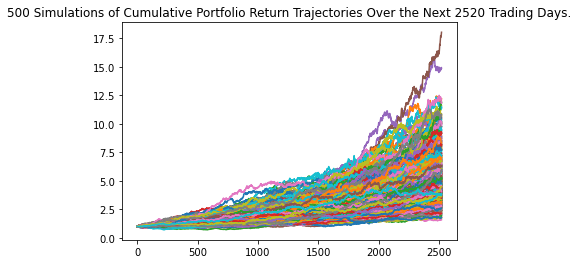

In [33]:
 # Plot simulation outcomes
line_plot_wo10y = MC_wo_tesla_10y.plot_simulation()

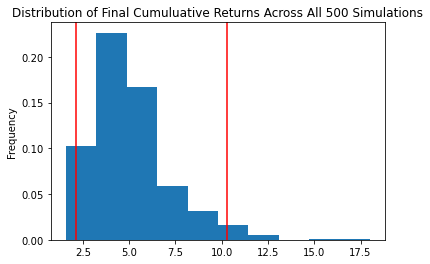

In [34]:
dist_plot_wo10y = MC_wo_tesla_10y.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_wo10y = MC_wo_tesla_10y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_wo10y)

count           500.000000
mean              5.073413
std               2.123398
min               1.580256
25%               3.604902
50%               4.638469
75%               6.088554
max              18.020764
95% CI Lower      2.143196
95% CI Upper     10.268461
Name: 2520, dtype: float64


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_wo10y = round(stocks_tbl_wo10y[8]*initial_investment,2)
ci_upper_wo10y = round(stocks_tbl_wo10y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_wo10y} and ${ci_upper_wo10y} over the next 10 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $21431.96 and $102684.61 over the next 10 years


In [37]:
# Configure a Monte Carlo simulation to forecast 20 years daily returns
MC_wo_tesla_20y = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [0.25, 0.25, 0.25, 0.25],
    num_simulation = num_sims,
    num_trading_days = 252*20
)
MC_wo_tesla_20y.portfolio_data.head()

AAPL                                                   BRK.B  \
              open    high      low   close    volume daily_return    open   
2015-01-02  111.39  111.44  107.350  109.30  47045497          NaN  151.50   
2015-01-05  108.29  108.65  105.410  106.25  50146623    -0.027905  148.81   
2015-01-06  106.56  107.43  104.630  106.23  59441540    -0.000188  147.64   
2015-01-07  107.20  108.20  106.695  107.75  34452408     0.014309  147.94   
2015-01-08  109.23  112.15  108.700  111.87  50255019     0.038237  150.60   

                                       ...   GOOGL                   \
                high      low   close  ...     low   close   volume   
2015-01-02  151.6000  148.500  149.13  ...  527.88  529.55   829538   
2015-01-05  149.0000  146.780  147.07  ...  517.75  519.24  1300076   
2015-01-06  148.5300  146.111  146.70  ...  505.55  506.89  1878228   
2015-01-07  149.1399  147.650  148.81  ...  503.65  505.15  1683477   
2015-01-08  151.3300  150.510  151.25  ...  495.02  506.85  2500177   

                            JNJ                                                 
           daily_return    open    high      low   close   volume daily_return  
2015-01-02          NaN  105.05  105.55  104.130  104.49  4238082          NaN  
2015-01-05    -0.019469  104.48  104.73  103.682  103.85  6135505    -0.006125  
2015-01-06    -0.023785  104.34  104.99  102.940  103.25  6174712    -0.005778  
2015-01-07    -0.003433  103.91  105.83  103.810  105.56  6744677     0.022373  
2015-01-08     0.003365  106.06  106.49  105.750  106.38  7432752     0.007768  

[5 rows x 24 columns]

In [38]:
MC_wo_tesla_20y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4         5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000  1.000000   
1      1.013130   0.992195   0.988923   0.996524   0.998541  1.002784   
2      1.023367   0.988218   0.996800   1.008593   1.004917  1.006156   
3      1.032391   0.983861   0.989513   1.009632   1.015012  1.000564   
4      1.023179   0.985343   0.996257   0.999359   1.010099  0.993141   
...         ...        ...        ...        ...        ...       ...   
5036  14.506416  12.734615  23.675144  33.734272  15.519657  9.676815   
5037  14.363703  12.612179  23.559354  33.789876  15.403654  9.685089   
5038  14.507932  12.668369  23.515104  34.078111  15.350027  9.617149   
5039  14.551204  12.839343  23.240829  34.582763  15.384576  9.685520   
5040  14.489507  13.017879  23.642287  34.893744  15.496252  9.711582   

            6          7          8          9    ...        490        491  \
0      1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1      0.993970   1.000919   1.009813   0.997439  ...   1.002849   1.014497   
2      0.997422   0.991708   1.020827   0.998766  ...   0.996474   1.012100   
3      0.998990   0.993592   1.011533   1.001531  ...   0.998066   1.026163   
4      1.012242   0.997230   1.017597   0.999786  ...   1.000667   1.022113   
...         ...        ...        ...        ...  ...        ...        ...   
5036  47.424872  21.879601  30.058231  30.467261  ...  26.740730  31.465067   
5037  47.613410  21.988476  30.132038  30.729025  ...  26.842751  31.460109   
5038  48.302248  21.743442  30.165841  30.323011  ...  26.499669  31.515160   
5039  48.095361  21.724809  30.227587  30.290187  ...  26.298431  31.405997   
5040  48.131760  21.573523  30.245724  30.300677  ...  26.223093  31.924057   

            492        493       494        495        496        497  \
0      1.000000   1.000000  1.000000   1.000000   1.000000   1.000000   
1      1.015757   1.016853  1.008347   0.994030   1.004876   0.983716   
2      1.030658   1.025309  1.013551   0.987480   0.997660   0.965838   
3      1.026786   1.013574  1.025446   0.983322   1.001106   0.971735   
4      1.033194   1.027822  1.036854   0.982527   1.006884   0.974777   
...         ...        ...       ...        ...        ...        ...   
5036  24.925682  16.911432  8.228756  30.027870  17.046971  15.829405   
5037  24.991275  16.876688  8.205866  29.951295  17.020996  15.891113   
5038  25.044022  17.047615  8.380736  30.450543  16.977351  15.730616   
5039  25.427673  17.132376  8.534532  30.534247  16.948009  15.787475   
5040  25.585371  17.267189  8.506356  30.268980  16.717624  15.624605   

            498        499  
0      1.000000   1.000000  
1      0.991030   1.002171  
2      0.995631   1.010661  
3      0.993380   1.022100  
4      0.992353   1.029227  
...         ...        ...  
5036  31.889947  38.862374  
5037  31.750426  38.307831  
5038  31.632537  38.116796  
5039  31.857523  38.448234  
5040  31.857416  38.381265  

[5041 rows x 500 columns]

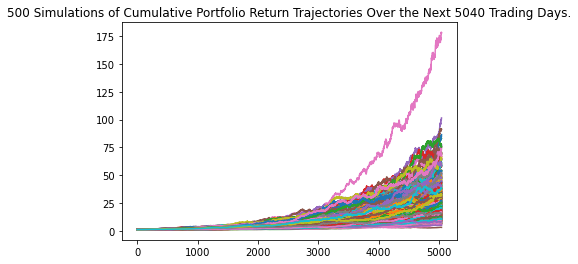

In [39]:
 # Plot simulation outcomes
line_plot_wo20y = MC_wo_tesla_20y.plot_simulation()

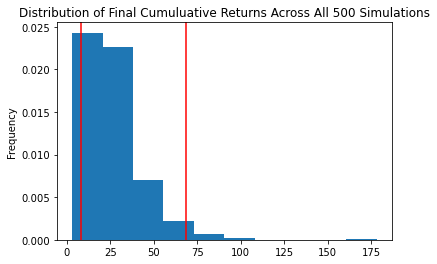

In [40]:
dist_plot_wo20y = MC_wo_tesla_20y.plot_distribution().get_figure().savefig('MCS_wo_TESLA_20y.png')

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_wo20y = MC_wo_tesla_20y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_wo20y)

count           500.000000
mean             26.710138
std              16.689584
min               3.029235
25%              15.835571
50%              22.565092
75%              33.113319
max             178.202857
95% CI Lower      8.297221
95% CI Upper     68.366661
Name: 5040, dtype: float64


In [45]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_wo20y = round(stocks_tbl_wo20y[8]*initial_investment,2)
ci_upper_wo20y = round(stocks_tbl_wo20y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_wo20y} and ${ci_upper_wo20y} over the next 20 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $82972.21 and $683666.61 over the next 20 years


In [46]:
wtesla_portfolio = pd.concat([df_portfolio_year, tesla_portfolio_year], axis="columns", join="inner")

# Configure a Monte Carlo simulation to forecast 5 years daily returns with TESLA stock
MC_w_tesla_5y = MCSimulation(
    portfolio_data = wtesla_portfolio,
    weights = [0.2, 0.2, 0.2, 0.2, 0.2],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
MC_w_tesla_5y.portfolio_data.head()

AAPL                                                   BRK.B  \
              open    high      low   close    volume daily_return    open   
2015-01-02  111.39  111.44  107.350  109.30  47045497          NaN  151.50   
2015-01-05  108.29  108.65  105.410  106.25  50146623    -0.027905  148.81   
2015-01-06  106.56  107.43  104.630  106.23  59441540    -0.000188  147.64   
2015-01-07  107.20  108.20  106.695  107.75  34452408     0.014309  147.94   
2015-01-08  109.23  112.15  108.700  111.87  50255019     0.038237  150.60   

                                       ...      JNJ                   \
                high      low   close  ...      low   close   volume   
2015-01-02  151.6000  148.500  149.13  ...  104.130  104.49  4238082   
2015-01-05  149.0000  146.780  147.07  ...  103.682  103.85  6135505   
2015-01-06  148.5300  146.111  146.70  ...  102.940  103.25  6174712   
2015-01-07  149.1399  147.650  148.81  ...  103.810  105.56  6744677   
2015-01-08  151.3300  150.510  151.25  ...  105.750  106.38  7432752   

                           TSLA                                       \
           daily_return    open      high       low   close   volume   
2015-01-02          NaN  222.87  223.2500  213.2600  219.19  3943826   
2015-01-05    -0.006125  214.55  216.5000  207.1626  210.01  4577520   
2015-01-06    -0.005778  210.06  214.2000  204.2100  211.19  5383509   
2015-01-07     0.022373  213.35  214.7800  209.7800  210.81  2582044   
2015-01-08     0.007768  212.81  213.7999  210.0100  210.55  2922730   

                         
           daily_return  
2015-01-02          NaN  
2015-01-05    -0.041881  
2015-01-06     0.005619  
2015-01-07    -0.001799  
2015-01-08    -0.001233  

[5 rows x 30 columns]

In [47]:
MC_w_tesla_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.004863  1.007045  1.005737  1.008274  0.990500  0.994023  1.015866   
2     0.997898  0.994927  1.005008  1.004917  0.990582  1.004592  1.016344   
3     0.996332  1.006858  0.998263  1.007912  1.002828  0.991942  1.018250   
4     0.996576  1.000847  0.996823  1.006517  0.993844  0.971950  1.018759   
...        ...       ...       ...       ...       ...       ...       ...   
1256  3.027796  2.994921  2.689504  3.250167  3.417552  2.266878  3.102139   
1257  2.979273  3.039921  2.695644  3.188269  3.403831  2.258999  3.100387   
1258  3.024052  3.022412  2.685410  3.241802  3.417828  2.243505  3.128176   
1259  3.049313  2.986799  2.712011  3.242925  3.409251  2.249416  3.166849   
1260  3.036895  2.956956  2.726119  3.290857  3.373092  2.261189  3.156305   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.017952  0.982244  0.991711  ...  0.986545  0.991276  0.995859   
2     1.030466  0.990431  0.996623  ...  0.983025  1.002434  0.994225   
3     1.051573  0.979414  0.992761  ...  0.979425  0.993240  1.000271   
4     1.053295  0.979780  0.983182  ...  0.967055  1.000658  1.002484   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.436521  3.481442  2.860300  ...  2.506450  2.338021  2.560726   
1257  1.420346  3.454588  2.843846  ...  2.483133  2.315011  2.550403   
1258  1.449919  3.453657  2.837312  ...  2.482168  2.325547  2.604507   
1259  1.443468  3.455449  2.847316  ...  2.527703  2.346558  2.573940   
1260  1.432593  3.464960  2.875075  ...  2.535326  2.343066  2.586144   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.003401  0.984040  0.981312  0.985742  1.001583  1.013415  0.996213  
2     1.004928  0.984385  0.991314  0.978247  1.002011  1.025616  0.992731  
3     1.009010  0.978077  1.005223  0.981607  0.996777  1.021479  1.000439  
4     1.013981  0.996031  1.029173  0.984651  0.999888  1.030436  0.975636  
...        ...       ...       ...       ...       ...       ...       ...  
1256  4.168808  6.165649  2.350147  2.263698  2.707568  4.073182  2.955056  
1257  4.150624  6.130818  2.382150  2.272942  2.686314  4.049664  2.977314  
1258  4.169370  6.132969  2.370441  2.268450  2.706010  3.974088  2.987411  
1259  4.193642  6.191353  2.371751  2.290215  2.703892  3.994909  2.978537  
1260  4.191741  6.280524  2.372152  2.247654  2.712228  4.041615  2.935435  

[1261 rows x 500 columns]

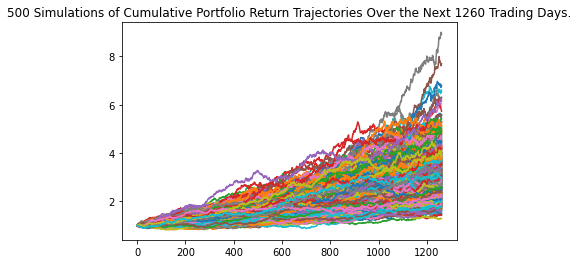

In [48]:
 # Plot simulation outcomes
line_plot_w5y = MC_w_tesla_5y.plot_simulation()

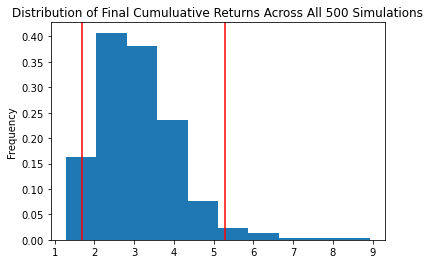

In [49]:
dist_plot_w5y = MC_w_tesla_5y.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_w5y = MC_w_tesla_5y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_w5y)

count           500.000000
mean              3.089527
std               0.986901
min               1.281354
25%               2.383313
50%               2.931084
75%               3.657490
max               8.940699
95% CI Lower      1.698142
95% CI Upper      5.288020
Name: 1260, dtype: float64


In [51]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_w5y = round(stocks_tbl_w5y[8]*initial_investment,2)
ci_upper_w5y = round(stocks_tbl_w5y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_w5y} and ${ci_upper_w5y} over the next 5 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $16981.42 and $52880.2 over the next 5 years


In [52]:
# Configure a Monte Carlo simulation to forecast 10 years daily returns with TESLA stock
MC_w_tesla_10y = MCSimulation(
    portfolio_data = wtesla_portfolio,
    weights = [0.2, 0.2, 0.2, 0.2, 0.2],
    num_simulation = num_sims,
    num_trading_days = 252*10
)
MC_w_tesla_10y.portfolio_data.head()

AAPL                                                   BRK.B  \
              open    high      low   close    volume daily_return    open   
2015-01-02  111.39  111.44  107.350  109.30  47045497          NaN  151.50   
2015-01-05  108.29  108.65  105.410  106.25  50146623    -0.027905  148.81   
2015-01-06  106.56  107.43  104.630  106.23  59441540    -0.000188  147.64   
2015-01-07  107.20  108.20  106.695  107.75  34452408     0.014309  147.94   
2015-01-08  109.23  112.15  108.700  111.87  50255019     0.038237  150.60   

                                       ...      JNJ                   \
                high      low   close  ...      low   close   volume   
2015-01-02  151.6000  148.500  149.13  ...  104.130  104.49  4238082   
2015-01-05  149.0000  146.780  147.07  ...  103.682  103.85  6135505   
2015-01-06  148.5300  146.111  146.70  ...  102.940  103.25  6174712   
2015-01-07  149.1399  147.650  148.81  ...  103.810  105.56  6744677   
2015-01-08  151.3300  150.510  151.25  ...  105.750  106.38  7432752   

                           TSLA                                       \
           daily_return    open      high       low   close   volume   
2015-01-02          NaN  222.87  223.2500  213.2600  219.19  3943826   
2015-01-05    -0.006125  214.55  216.5000  207.1626  210.01  4577520   
2015-01-06    -0.005778  210.06  214.2000  204.2100  211.19  5383509   
2015-01-07     0.022373  213.35  214.7800  209.7800  210.81  2582044   
2015-01-08     0.007768  212.81  213.7999  210.0100  210.55  2922730   

                         
           daily_return  
2015-01-02          NaN  
2015-01-05    -0.041881  
2015-01-06     0.005619  
2015-01-07    -0.001799  
2015-01-08    -0.001233  

[5 rows x 30 columns]

In [53]:
MC_w_tesla_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.981768  1.004762  1.010511  0.995665  0.990891  0.991602  1.000530   
2     0.979781  0.996963  1.007309  0.992245  1.005450  0.993126  1.009992   
3     0.991663  0.995250  1.018769  0.985619  0.996436  0.992617  0.999737   
4     0.995782  0.981928  1.014075  1.005045  1.015128  0.991489  0.992500   
...        ...       ...       ...       ...       ...       ...       ...   
2516  5.139410  6.954392  5.794668  9.193026  7.424804  6.568026  7.144381   
2517  5.243247  7.018764  5.778575  9.237351  7.384375  6.598463  7.157667   
2518  5.322217  7.065427  5.810910  9.291546  7.392711  6.647166  7.081684   
2519  5.376695  7.205074  5.807410  9.320622  7.536997  6.655167  7.137827   
2520  5.389531  7.291168  5.806097  9.185779  7.501682  6.695510  7.138736   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.023991  0.999117  1.007480  ...  0.992087  1.015713  0.998654   
2     1.034226  1.008692  1.015762  ...  1.000635  1.025097  0.996152   
3     1.026623  1.003319  1.005957  ...  1.014712  1.038074  0.987281   
4     1.017360  1.014038  1.014806  ...  1.010320  1.063441  0.980680   
...        ...       ...       ...  ...       ...       ...       ...   
2516  9.335575  3.729568  7.624614  ...  4.175491  7.253342  6.668976   
2517  9.367068  3.742578  7.522874  ...  4.269936  7.206653  6.719310   
2518  9.296602  3.804001  7.644642  ...  4.256856  7.260963  6.852780   
2519  9.204461  3.857334  7.662484  ...  4.244923  7.266005  6.914685   
2520  9.150026  3.919009  7.617141  ...  4.351089  7.219137  6.865439   

           493        494       495       496       497       498        499  
0     1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  
1     1.011065   1.000577  1.001189  0.971855  1.018654  1.011857   1.007045  
2     1.013775   1.007335  0.999866  0.958027  1.021340  1.016668   1.014914  
3     1.011560   0.997917  1.000826  0.958553  1.026057  1.002487   1.022684  
4     1.014849   0.985484  1.019774  0.947997  1.005789  1.004130   1.025971  
...        ...        ...       ...       ...       ...       ...        ...  
2516  4.371189  10.548689  8.310434  8.508080  8.013807  5.112305  10.429504  
2517  4.336254  10.447803  8.230625  8.496666  8.027759  5.093793  10.483423  
2518  4.402416  10.324588  8.190062  8.601788  7.957174  5.071650  10.426922  
2519  4.426347  10.353513  8.193971  8.728395  8.037865  5.063112  10.426317  
2520  4.467087  10.374118  8.302013  8.732705  7.998262  5.047724  10.574295  

[2521 rows x 500 columns]

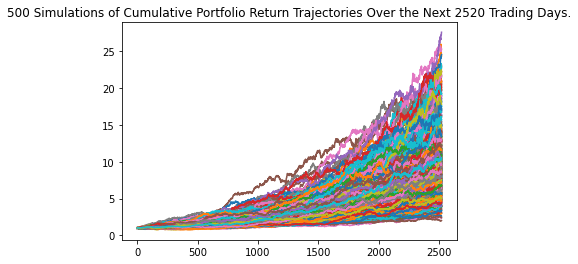

In [54]:
 # Plot simulation outcomes
line_plot_w10y = MC_w_tesla_10y.plot_simulation()

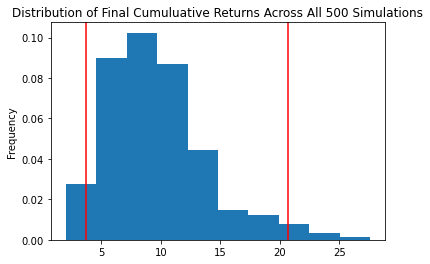

In [55]:
dist_plot_w10y = MC_w_tesla_10y.plot_distribution()

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_w10y = MC_w_tesla_10y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_w10y)

count           500.000000
mean              9.693091
std               4.264151
min               2.018829
25%               6.647552
50%               9.043960
75%              11.661788
max              27.596651
95% CI Lower      3.716457
95% CI Upper     20.714441
Name: 2520, dtype: float64


In [57]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_w10y = round(stocks_tbl_w10y[8]*initial_investment,2)
ci_upper_w10y = round(stocks_tbl_w10y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_w10y} and ${ci_upper_w10y} over the next 10 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $37164.57 and $207144.41 over the next 10 years


In [58]:
# Configure a Monte Carlo simulation to forecast 20 years daily returns with TESLA stock
MC_w_tesla_20y = MCSimulation(
    portfolio_data = wtesla_portfolio,
    weights = [0.2, 0.2, 0.2, 0.2, 0.2],
    num_simulation = num_sims,
    num_trading_days = 252*20
)
MC_w_tesla_20y.portfolio_data.head()

AAPL                                                   BRK.B  \
              open    high      low   close    volume daily_return    open   
2015-01-02  111.39  111.44  107.350  109.30  47045497          NaN  151.50   
2015-01-05  108.29  108.65  105.410  106.25  50146623    -0.027905  148.81   
2015-01-06  106.56  107.43  104.630  106.23  59441540    -0.000188  147.64   
2015-01-07  107.20  108.20  106.695  107.75  34452408     0.014309  147.94   
2015-01-08  109.23  112.15  108.700  111.87  50255019     0.038237  150.60   

                                       ...      JNJ                   \
                high      low   close  ...      low   close   volume   
2015-01-02  151.6000  148.500  149.13  ...  104.130  104.49  4238082   
2015-01-05  149.0000  146.780  147.07  ...  103.682  103.85  6135505   
2015-01-06  148.5300  146.111  146.70  ...  102.940  103.25  6174712   
2015-01-07  149.1399  147.650  148.81  ...  103.810  105.56  6744677   
2015-01-08  151.3300  150.510  151.25  ...  105.750  106.38  7432752   

                           TSLA                                       \
           daily_return    open      high       low   close   volume   
2015-01-02          NaN  222.87  223.2500  213.2600  219.19  3943826   
2015-01-05    -0.006125  214.55  216.5000  207.1626  210.01  4577520   
2015-01-06    -0.005778  210.06  214.2000  204.2100  211.19  5383509   
2015-01-07     0.022373  213.35  214.7800  209.7800  210.81  2582044   
2015-01-08     0.007768  212.81  213.7999  210.0100  210.55  2922730   

                         
           daily_return  
2015-01-02          NaN  
2015-01-05    -0.041881  
2015-01-06     0.005619  
2015-01-07    -0.001799  
2015-01-08    -0.001233  

[5 rows x 30 columns]

In [59]:
MC_w_tesla_20y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2           3          4          5    \
0       1.000000   1.000000   1.000000    1.000000   1.000000   1.000000   
1       1.030356   0.992060   0.998780    0.982422   1.004863   1.001748   
2       1.037203   0.991574   1.012594    0.982994   1.003134   1.002612   
3       1.025750   0.996915   0.993410    0.985098   1.000940   1.008941   
4       1.035015   1.005698   0.990708    0.990934   1.015274   0.995994   
...          ...        ...        ...         ...        ...        ...   
5036  199.713761  13.635613  62.349177  109.395011  99.456779  40.660896   
5037  197.848192  13.703478  62.560484  110.456536  99.862761  40.770989   
5038  198.019961  13.786647  61.882941  110.798230  98.238189  40.968734   
5039  198.066594  13.772532  63.263926  112.010543  99.070581  41.405111   
5040  197.727645  13.781377  63.115570  112.275883  99.106062  41.214730   

            6          7           8          9    ...        490         491  \
0      1.000000   1.000000    1.000000   1.000000  ...   1.000000    1.000000   
1      0.995175   1.002245    0.997009   0.995826  ...   1.006053    1.007290   
2      0.983680   1.000673    1.017805   0.997759  ...   1.013194    0.997599   
3      0.998057   1.006478    1.017424   0.994083  ...   1.014368    1.015359   
4      0.997486   1.015138    1.015314   0.998548  ...   1.012126    1.030996   
...         ...        ...         ...        ...  ...        ...         ...   
5036  52.831880  25.138777  161.777044  91.904901  ...  36.955626  231.343430   
5037  52.633141  25.151355  161.997895  92.330846  ...  37.483994  231.781330   
5038  52.618479  25.073747  161.341362  91.999919  ...  37.607860  234.881365   
5039  52.784151  25.110141  159.762301  92.559963  ...  37.147076  236.915649   
5040  52.707990  25.090120  160.082393  92.457493  ...  37.135026  236.271055   

            492         493        494        495        496        497  \
0      1.000000    1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.004381    0.998422   0.996347   1.002266   0.995941   1.016380   
2      1.009872    1.003672   0.986323   0.996614   0.997732   1.024725   
3      1.016168    1.010152   0.978956   0.989560   0.982074   1.031570   
4      1.023930    1.009816   0.979792   0.998910   0.973734   1.027787   
...         ...         ...        ...        ...        ...        ...   
5036  22.535851  240.428689  65.578125  40.828718  53.028378  37.906205   
5037  22.671787  240.626969  65.654837  40.458098  52.363359  38.049975   
5038  22.462238  238.440072  65.832619  40.910410  52.520507  38.102414   
5039  22.615062  238.939216  65.517190  40.602505  52.475138  37.930683   
5040  22.883358  238.641400  65.814239  40.265172  51.709432  37.648269   

            498        499  
0      1.000000   1.000000  
1      1.007795   1.002406  
2      1.006545   1.006866  
3      1.021481   0.995410  
4      1.019600   0.986540  
...         ...        ...  
5036  78.557424  55.333667  
5037  78.102990  55.647763  
5038  76.725351  55.346682  
5039  76.886451  55.779570  
5040  77.641861  55.401718  

[5041 rows x 500 columns]

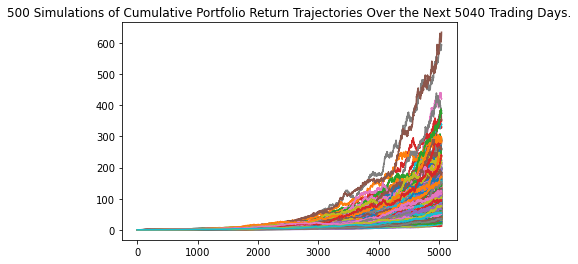

In [60]:
 # Plot simulation outcomes
line_plot_w20y = MC_w_tesla_20y.plot_simulation()

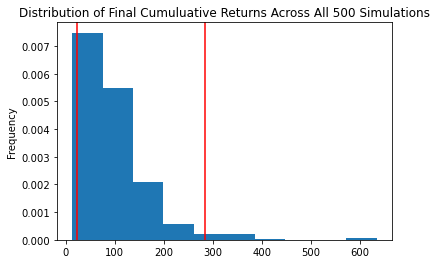

In [69]:
dist_plot_w20y = MC_w_tesla_20y.plot_distribution().get_figure().savefig('MCS_w_TESLA_20y.png')

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_w20y = MC_w_tesla_20y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_w20y)

count           500.000000
mean             98.993662
std              71.799150
min              13.206872
25%              51.654612
50%              79.349381
75%             125.965562
max             633.423913
95% CI Lower     22.678195
95% CI Upper    283.544951
Name: 5040, dtype: float64


In [68]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_w20y = round(stocks_tbl_w20y[8]*initial_investment,2)
ci_upper_w20y = round(stocks_tbl_w20y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_w20y} and ${ci_upper_w20y} over the next 20 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $226781.95 and $2835449.51 over the next 20 years
